![openclassrooms](https://s3.eu-west-1.amazonaws.com/course.oc-static.com/courses/6204541/1+HnqdJ-5ofxiPP9HIxdNdpw.jpeg)
# Plot Charts Using Matplotlib
You’re in the process of preparing a monthly report to present to your manager at the end of each month. The presentation will need to include some key charts, so you’ll have to use your data visualization skills to produce the different visuals your manager requires.

The charts you need to produce are as follows:
- Percentage of loans of each type
- Monthly profit based on customer income for real estate loans only
- Profit distribution
- Total monthly profit by branch


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

To create these different charts, we’re going to use the enhanced loan data file ([see previous exercise](https://colab.research.google.com/github/OpenClassrooms-Student-Center/en-8253136-Use-Python-Libraries-for-Data-Science/blob/main/notebooks/P2/P2C3%20-%20Filter%20Data%20in%20a%20DataFrame%20-%20CORRECTION.ipynb)) that you can find [here](https://raw.githubusercontent.com/OpenClassrooms-Student-Center/en-8253136-Use-Python-Libraries-for-Data-Science/main/data/loans_final.csv):

In [5]:
loans = pd.read_csv('https://raw.githubusercontent.com/OpenClassrooms-Student-Center/en-8253136-Use-Python-Libraries-for-Data-Science/main/data/loans_final.csv')
loans.head()

,identifier,city,zip code,income,repayment,term,type,interest_rate,debt_to_income,total_cost,profit,risk
0,0,CHICAGO,60100,3669.0,1130.05,240,real estate,1.168,30.80,271212.0,131.99,No
1,1,DETROIT,48009,5310.0,240.00,64,automobile,3.701,4.52,15360.0,23.69,No
2,1,DETROIT,48009,5310.0,1247.85,300,real estate,1.173,23.50,374355.0,182.97,No
3,2,SAN FRANCISCO,94010,1873.0,552.54,240,real estate,0.972,29.50,132609.6,53.71,No
4,3,SAN FRANCISCO,94010,1684.0,586.03,180,real estate,1.014,34.80,105485.4,44.57,No


## 1. Percentage of loans by loan type
The first thing you need to do is aggregate the data. There are different ways of doing this, but here are a couple:
- Using `groupby`
- Using the `value_counts` method

You’ll get exactly the same result from these two methods.


In [6]:
# We can
# use groupby:
type_agg = loans.groupby('type').size().reset_index()

# use value_counts
type_agg = loans['type'].value_counts().reset_index()

# rename all columns at the same time
type_agg.columns = ['type','count']

type_agg


,type,count
0,real estate,228
1,automobile,16


You could choose a bar chart or a pie chart for your visual:

<BarContainer object of 2 artists>

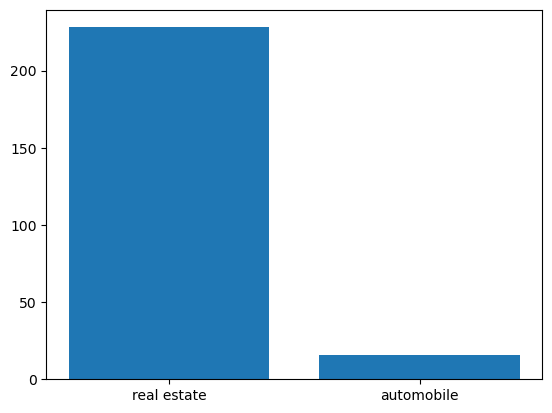

In [7]:
# bar chart

plt.bar(type_agg['type'], type_agg['count'])

([<matplotlib.patches.Wedge at 0x17564367e90>,
 [Text(-1.0767412667284106, 0.22500720993803233, 'real estate'),
  Text(1.0767412772617573, -0.22500715953213574, 'automobile')],
 [Text(-0.5873134182154967, 0.1227312054207449, '93.44%'),
  Text(0.5873134239609584, -0.12273117792661947, '6.56%')])

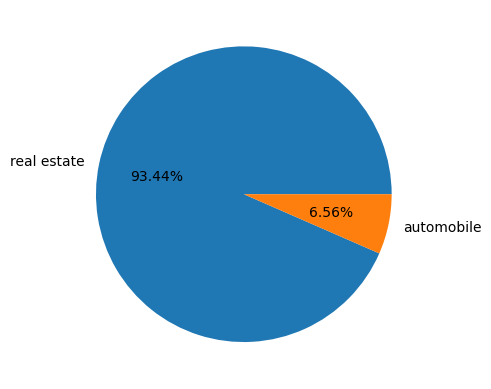

In [8]:
# pie chart

plt.pie(x=type_agg['count'], labels=type_agg['type'], autopct='%.2f%%')

## 2. Monthly profit based on customer income for real estate loans
We want to show two numeric variables, so we’ll choose a scatter plot.

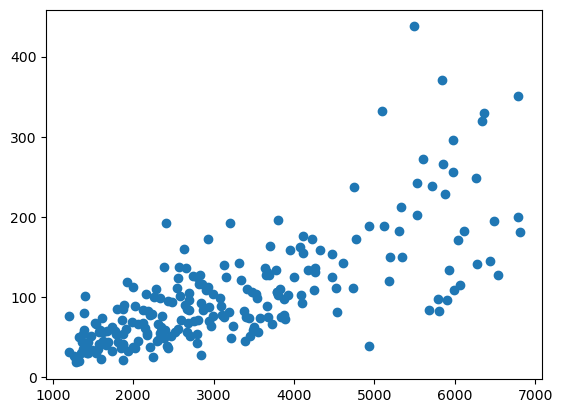

In [9]:
real_estate_loans = loans.loc[loans['type'] == 'real estate', :]
plt.scatter(real_estate_loans['income'], real_estate_loans['profit'])

## 3. Profit distribution
We want to show the distribution of a numeric variable, so we’ll use a histogram.


(array([63., 77., 57., 20., 12.,  7.,  2.,  4.,  1.,  1.]),
 array([  8.49 ,  51.404,  94.318, 137.232, 180.146, 223.06 , 265.974,
        308.888, 351.802, 394.716, 437.63 ]),
 <BarContainer object of 10 artists>)

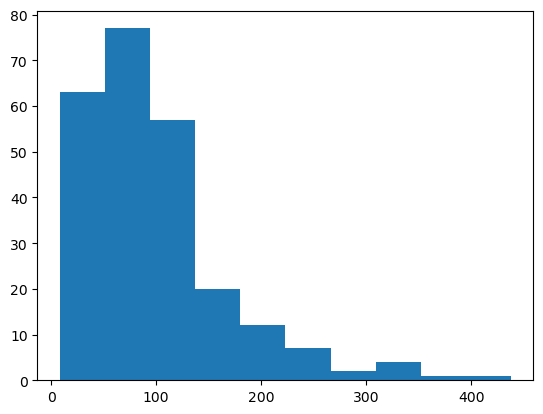

In [10]:
plt.hist(loans['profit'])

## 4. Total monthly profit by branch
Because some of the city names are quite long, you can stretch the chart horizontally to make them fit using the following line:

`plt.figure(figsize=(10,4))`

<BarContainer object of 6 artists>

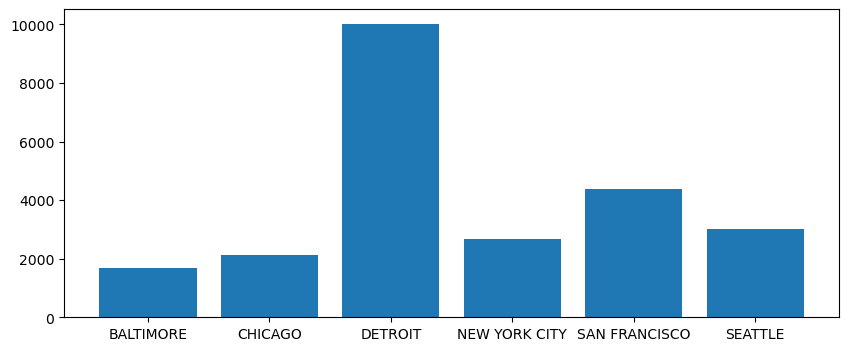

In [16]:
plt.figure(figsize=(10,4))
branch_profit = loans.groupby('city')['profit'].sum().reset_index()
plt.bar(branch_profit['city'], branch_profit['profit'])